In [161]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import pathlib as Path
import matplotlib.pyplot as plt

In [162]:
#dataset to be uploaded to github
df = pd.read_csv('digits.csv')

In [163]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [164]:
df.info() #no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [165]:
#splitting the data
X = df.iloc[:, :16].values
y = df.iloc[:, 16].values

In [166]:
print('The shape of X is ', X.shape)
print('The shpae of y is ', y.shape)

The shape of X is  (10992, 16)
The shpae of y is  (10992,)


In [167]:
def plotnPen(X, y, n, cols=3, lst=[]):
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()

    for i in range(n):
        rowData = X[lst[i]]
        classify = y[lst[i]]

        coords = rowData.reshape(8, 2)
        x_coords = coords[:, 0]
        y_coords = coords[:, 1]

        axes[i].scatter(x_coords, y_coords, color='red', marker='*')

        axes[i].set_xlim(-10, 110)
        axes[i].set_ylim(-10, 110)
        axes[i].set_aspect('equal', adjustable='box')
        axes[i].set_title(f"Category {classify}")
        axes[i].set_xlabel("X Coordinate")
        axes[i].set_ylabel("Y Coordinate")
        axes[i].grid(True)

    for j in range(n, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

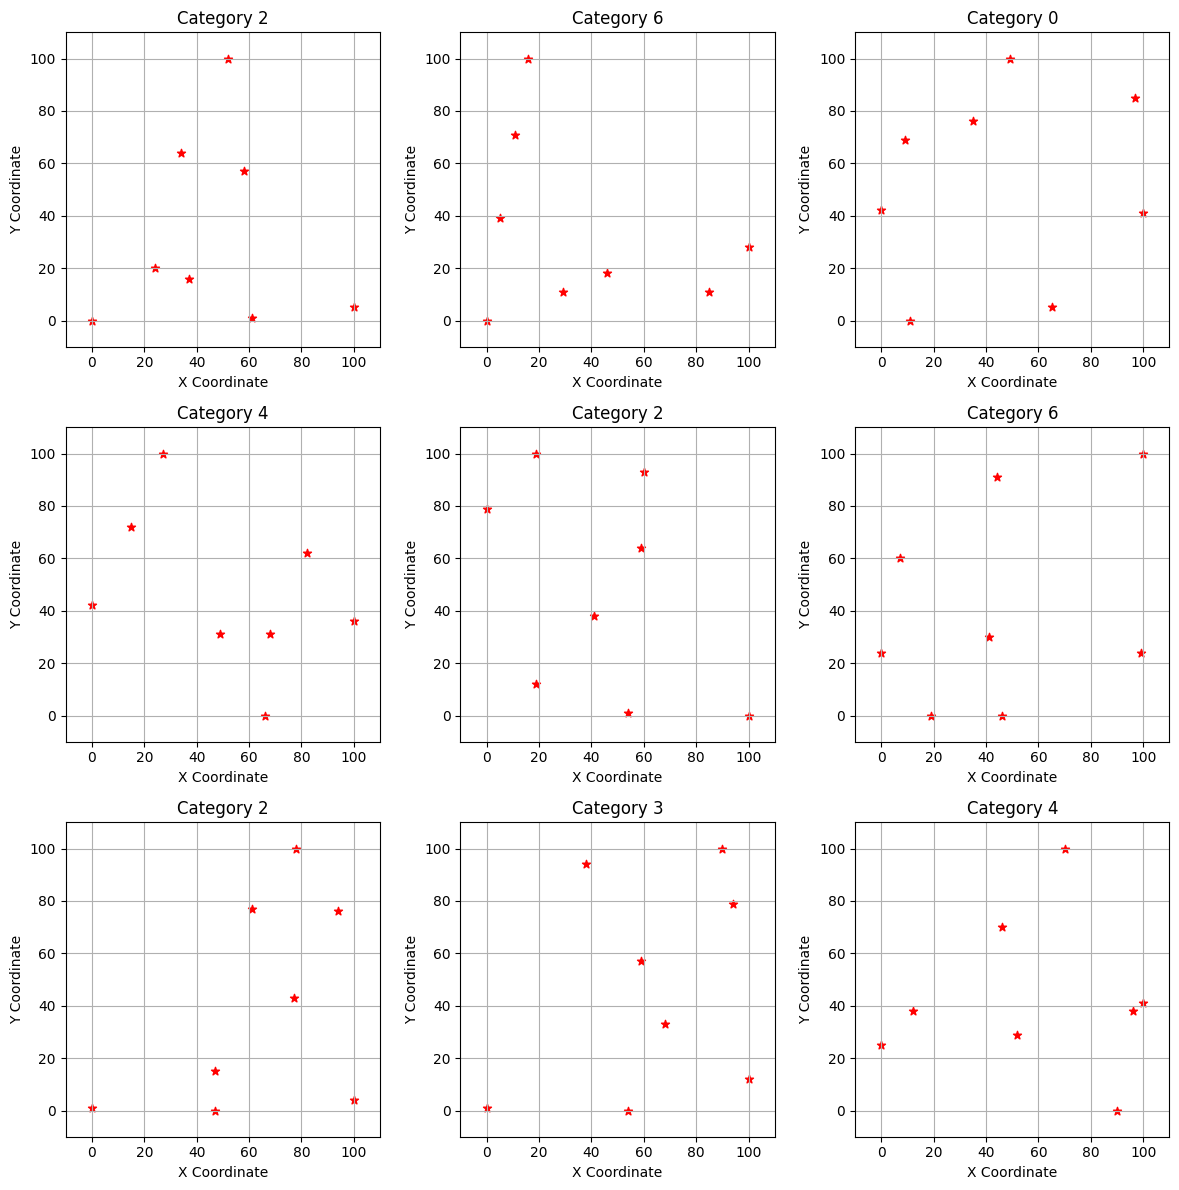

In [168]:
import random as random
lst = [227, 906, 71, 935, 603, 337, 757, 105, 272] #some random points
plotnPen(X, y, 9, lst=lst)

In [169]:
def plotnPenLines(X, y, n, cols=3, lst=[]):
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten()

    for i in range(n):
        rowData = X[lst[i]]
        classify = y[lst[i]]

        coords = rowData.reshape(8, 2)
        x_coords = coords[:, 0]
        y_coords = coords[:, 1]

        axes[i].plot(x_coords, y_coords, marker='o', color='red', linestyle='-', linewidth=1.5)

        axes[i].set_xlim(-10, 110)
        axes[i].set_ylim(-10, 110)
        axes[i].set_aspect('equal', adjustable='box')
        axes[i].set_title(f"Category {classify}")
        axes[i].set_xlabel("X Coordinate")
        axes[i].set_ylabel("Y Coordinate")
        axes[i].grid(True)

    for j in range(n, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

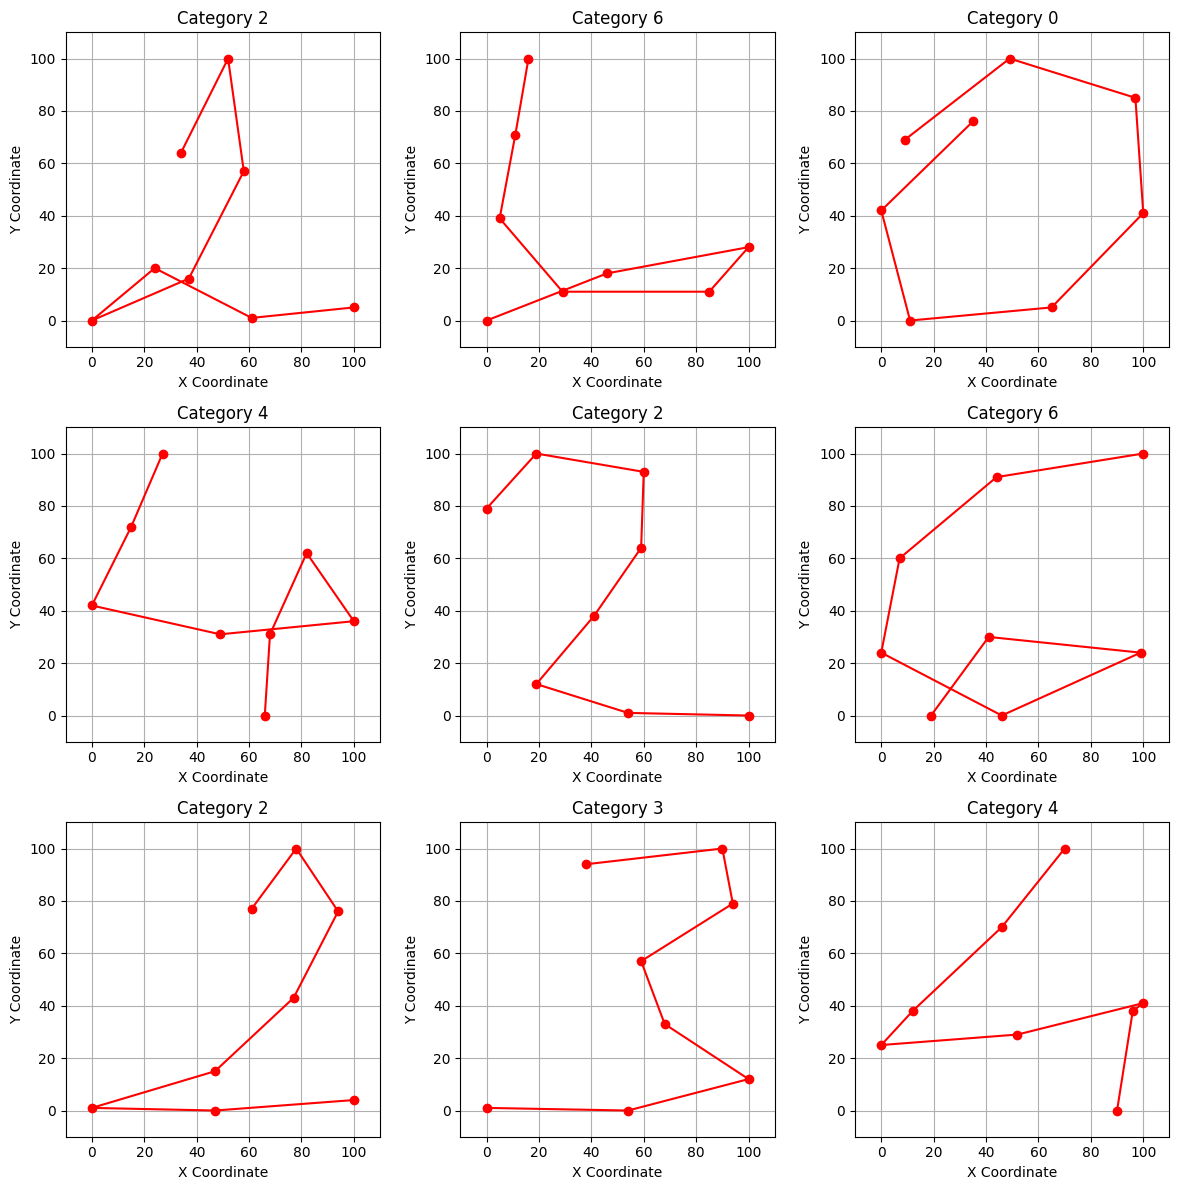

In [170]:
plotnPenLines(X, y, 9, lst=lst)

In [171]:
lst

[227, 906, 71, 935, 603, 337, 757, 105, 272]

In [172]:
#we need to encode the y labels as the no of digits(0-9) are limited we can use OneHotEnocoder
#also we dont need spare matrix as the digits as limited as we are not looking for memory saving
hotEncoder = OneHotEncoder(sparse_output=False)
y_encoded = hotEncoder.fit_transform(y.reshape(-1, 1)) #encoding the y labels

In [173]:
y_encoded[:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [174]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=2023425) #my rollno :)
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [175]:
#to build the model
#used 16-64-32-10 > 16-32-16-10
smartModel = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(16,)),  # as we have 16 features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # as 10 possible classfication
])

In [176]:
#comping the model
smartModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [177]:
#training the model
data = smartModel.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3906 - loss: 13.5033 - val_accuracy: 0.8873 - val_loss: 0.4904
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9073 - loss: 0.3321 - val_accuracy: 0.9399 - val_loss: 0.2469
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9473 - loss: 0.1750 - val_accuracy: 0.9606 - val_loss: 0.1736
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9613 - loss: 0.1260 - val_accuracy: 0.9742 - val_loss: 0.1338
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.0884 - val_accuracy: 0.9763 - val_loss: 0.1250
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9812 - loss: 0.0628 - val_accuracy: 0.9732 - val_loss: 0.1265
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9842 - loss: 0.0553 - val_accuracy: 0.9621 - val_loss: 0.1424
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0544 - val_accuracy: 0

In [178]:
#trest teh accuracy of the model
test_loss, test_accuracy = smartModel.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 - 0s - 2ms/step - accuracy: 0.9891 - loss: 0.0357
Test Accuracy: 98.91%


In [179]:
#lets try to train model few more time
data = smartModel.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9934 - val_loss: 0.0947
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0162 - val_accuracy: 0.9894 - val_loss: 0.1024
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9962 - loss: 0.0126 - val_accuracy: 0.9853 - val_loss: 0.1283
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9949 - loss: 0.0179 - val_accuracy: 0.9944 - val_loss: 0.0882
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9935 - loss: 0.0254 - val_accuracy: 0.9869 - val_loss: 0.1107
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0278 - val_accuracy: 0.9894 - val_loss: 0.0969
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9943 - loss: 0.0220 - val_accuracy: 0.9848 - val_loss: 0.1133
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.

In [180]:
#trest teh accuracy of the model
test_loss, test_accuracy = smartModel.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

35/35 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0237
Test Accuracy: 99.45%


In [181]:
smartModel.save("handdigitRecog.keras")